In [1]:
# only adjust settings in this cell
state = 'WV'
root_name = 'Berkeley'     # which county will root our district (or county_cluster==multi-district)?
k = 2                 # the state has this number of districts
deviation = 0          # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 1               # size=1 for single district, size=2 for double district, ...
obj_type = 'cut_edges' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 2 districts
We seek a multi-district (county cluster) of size = 1


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 896858
Single district upper population limit U = 896858


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Berkeley County to be the root. In our graph, this is vertex # 14


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 435 rows, 486 columns and 2092 nonzeros
Model fingerprint: 0xd5a26154
Variable types: 251 continuous, 235 integer (235 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 96 rows and 68 columns
Presolve time: 0.00s
Presolved: 339 rows, 418 columns, 1582 nonzeros
Variable types: 246 continuous, 172 integer (172 binary)

Root relaxation: objective 1.139748e+00, 179 iterations, 0.00 seconds (0.00 work units)



 1557731 595718   33.52726   35   56          -   26.44837      -  10.4  235s
 1571397 600107   30.48183   29   21          -   26.47472      -  10.4  240s
 1582345 603983   29.92543   29   38          -   26.49676      -  10.4  245s
 1598787 609220   31.76038   31    9          -   26.52938      -  10.4  250s
 1614519 614477   45.76888   37   35          -   26.56103      -  10.4  255s
 1628232 619309   28.21666   37    4          -   26.58592      -  10.4  260s
 1639496 623397   33.20941   42    4          -   26.60973      -  10.4  265s
 1654016 628424   26.73924   30    6          -   26.63893      -  10.4  270s
 1666839 632993   26.98843   30   35          -   26.66433      -  10.4  275s
 1679002 637133   29.08846   34   16          -   26.68844      -  10.4  280s
 1692138 641205 infeasible   42               -   26.71463      -  10.4  285s
 1704144 645840   39.25206   43    4          -   26.73814      -  10.4  290s
 1715619 649928   33.00000   41    5          -   26.76086      

 3032592 1007501   36.63325   40   16          -   28.78972      -  10.4  670s
 3065632 1014191   30.14315   34   11          -   28.84743      -  10.4  675s
 3097146 1020579 infeasible   41               -   28.90471      -  10.4  680s
 3124363 1026028   35.86380   40   33          -   28.95420      -  10.4  685s
found [1, 3, 5, 6, 7, 9, 11, 12, 14, 16, 20, 21, 24, 25, 27, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 44, 48, 49, 51, 53] with objective = 34.0
   replaced worse solution with objective = 37.0
adding cut saying that objective should be less than 37.0
 3160012 1033892   33.95374   37    4          -   29.00000      -  10.4  690s
 3201131 1043481   30.26992   35   24          -   29.00000      -  10.4  695s
 3241788 1056229   35.40035   46   12          -   29.00089      -  10.4  700s
 3281658 1064298 infeasible   37               -   29.05644      -  10.4  705s
 3316711 1071491   31.67157   30   39          -   29.09935      -  10.4  710s
found [0, 3, 4, 5, 7, 8, 9, 10, 12,

In no particular order, the top 10 clusters are:


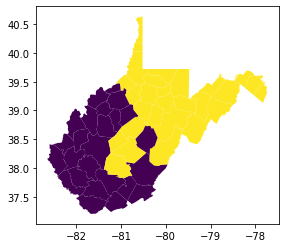

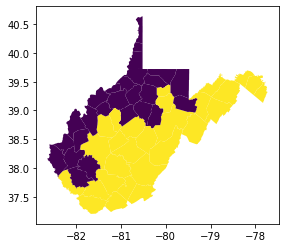

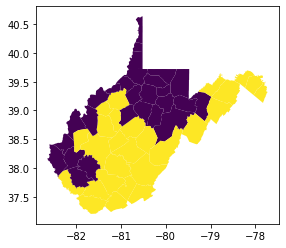

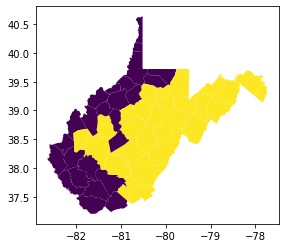

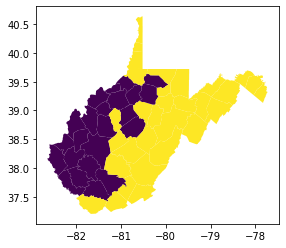

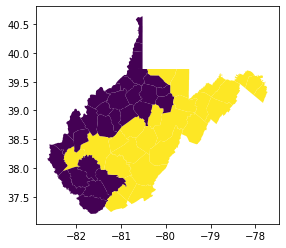

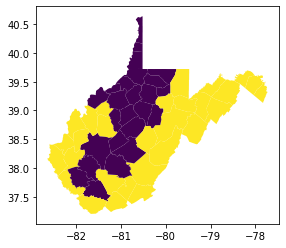

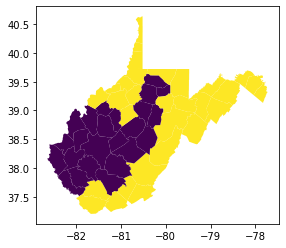

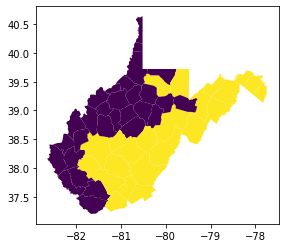

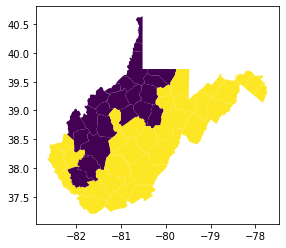

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )